In [22]:

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sns
import data_utils as data_utils
from functools import reduce

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

data_2017 = pd.read_csv("datasets/Base_De_Datos_PQRD_2017.csv", low_memory=False)
data_2017['year'] = 2017
data_2016 = pd.read_csv("datasets/Base_De_Datos_PQRD_2016.csv", low_memory=False)
data_2016['year'] = 2016
data_2015 = pd.read_csv("datasets/Base_De_Datos_PQRD_2015.csv", low_memory=False)
data_2015['year'] = 2015


colums_2017 = data_2017.columns.values
colums_2016 = data_2016.columns.values
colums_2015 = data_2015.columns.values
ds_columns = reduce(np.intersect1d, (colums_2017, colums_2016, colums_2015))
dataset = data_2017[ds_columns]
dataset = dataset.append(data_2016[ds_columns])
dataset = dataset.append(data_2015[ds_columns])


0                           1229121
Ninguno                     566026 
Secundaria                  268767 
Primaria                    136586 
Secundaria Incompleta       54394  
Universitario               50348  
Primaria Incompleta         42969  
Universitario Incompleto    20881  
Posgrado                    6279   
Name: AFEC_EDUC, dtype: int64


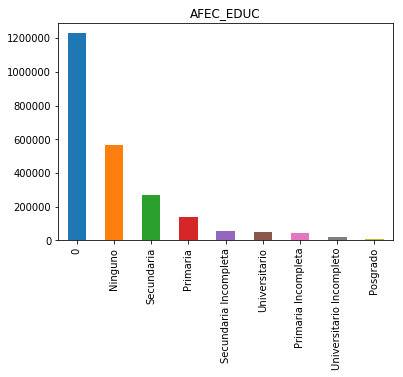

In [23]:
AFEC_EDUC = dataset['AFEC_EDUC'].value_counts().nlargest(n=10, keep='first')
print(AFEC_EDUC)
AFEC_EDUC.plot(kind='bar', title='AFEC_EDUC');


0         937839
Mujer     855394
Hombre    582138
Name: AFEC_GENERO, dtype: int64


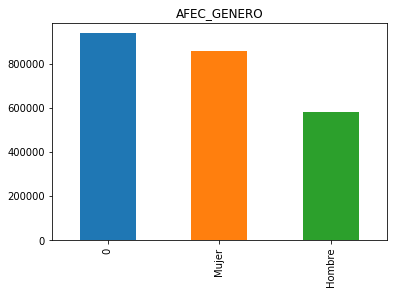

In [24]:
AFEC_GENERO = dataset['AFEC_GENERO'].value_counts().nlargest(n=10, keep='first')
print(AFEC_GENERO)
AFEC_GENERO.plot(kind='bar', title='AFEC_GENERO');

0         937839
Mujer     855394
Hombre    582138
Name: AFEC_GENERO, dtype: int64


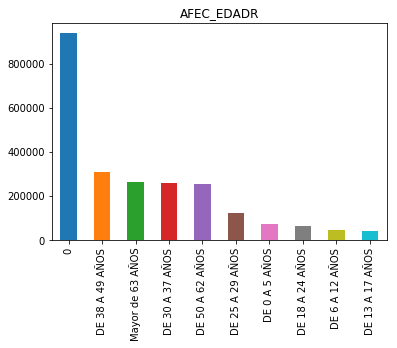

In [25]:
AFEC_EDADR = dataset['AFEC_EDADR'].value_counts().nlargest(n=10, keep='first')
print(AFEC_GENERO)
AFEC_EDADR.plot(kind='bar', title='AFEC_EDADR');

RESTRICCION EN EL ACCESO POR FALTA DE OPORTUNIDAD PARA LA ATENCION                          518446
SEGUIMIENTO A PQR                                                                           471040
VIGILADOS                                                                                   284720
0                                                                                           244588
RESTRICCION EN EL ACCESO POR DEMORAS EN LA AUTORIZACION                                     228729
RESTRICCION EN EL ACCESO POR FALLAS EN LA AFILIACION                                        103630
RESTRICCION EN LA LIBRE ESCOGENCIA                                                          72538 
NEGACION DE LA PRESTACION DE SERVICIOS, INSUMOS O MEDICAMENTOS O ENTREGA DE MEDICAMENTOS    62727 
CONTACT CENTER                                                                              57839 
NORMATIVIDAD DEL SGSSS                                                                      53650 
Name: MOTI

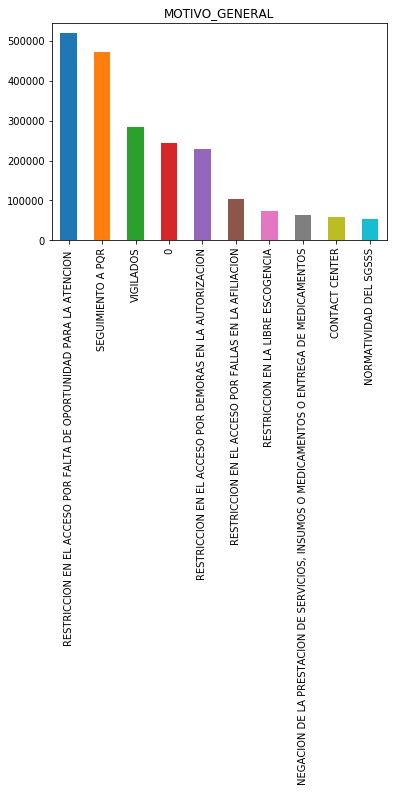

In [42]:
MOTIVO_GENERAL = dataset['MOTIVO_GENERAL'].value_counts().nlargest(n=10, keep='first')
print(MOTIVO_GENERAL)
MOTIVO_GENERAL.plot(kind='bar', title='MOTIVO_GENERAL');

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


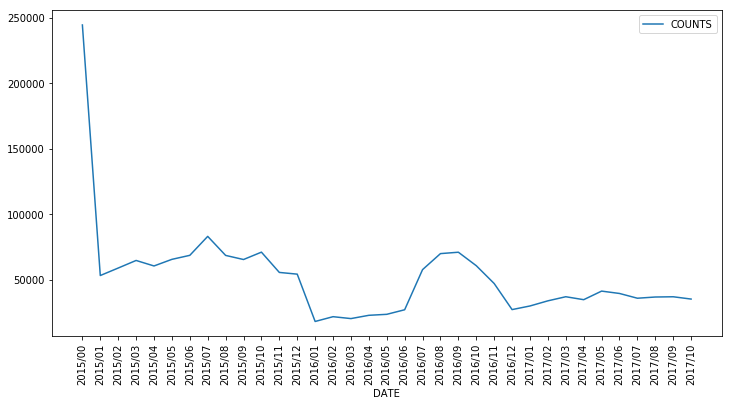

In [27]:
dataset['MES'] = dataset['MES'].apply(lambda m: '0' + str(m) if m < 10 else m)
canales_df = dataset.loc[(dataset['PQR_CANAL'] != "Chat") & (dataset['PQR_CANAL'] != "Correo") & (dataset['PQR_CANAL'] != "Web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(12,6), rot=90)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


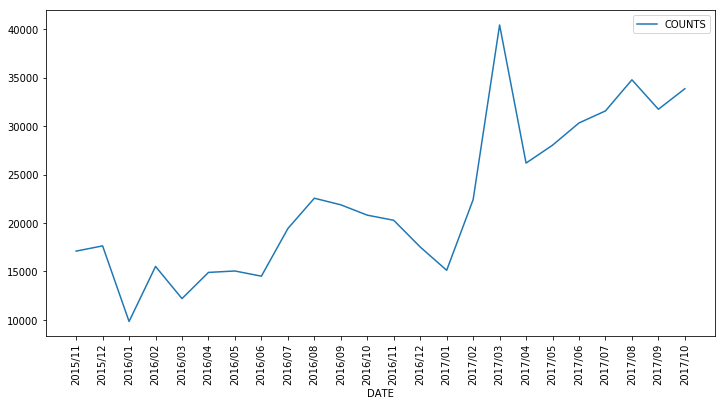

In [28]:
canales_df = dataset.loc[(dataset['PQR_CANAL'] == "Chat") | (dataset['PQR_CANAL'] == "Correo") | (dataset['PQR_CANAL'] == "Web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(12,6), rot=90)

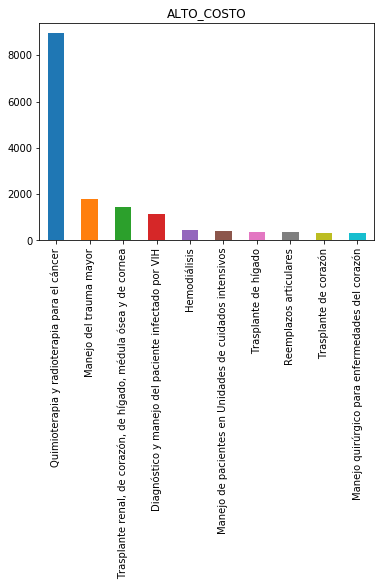

In [29]:
ALTO_COSTO = dataset['ALTO_COSTO'].loc[dataset['ALTO_COSTO'] != '0'].value_counts().nlargest(n=10, keep='first')
ALTO_COSTO.plot(kind='bar', title='ALTO_COSTO');

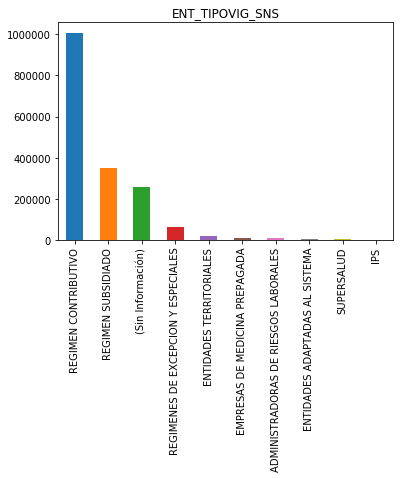

In [36]:

ENT_TIPOVIG_SNS = dataset['ENT_TIPOVIG_SNS'].loc[dataset['ENT_TIPOVIG_SNS'] != '0'].value_counts().nlargest(n=10, keep='first')
ENT_TIPOVIG_SNS.plot(kind='bar', title='ENT_TIPOVIG_SNS');



In [37]:
dataset[['ENT_TIPOVIG_SNS']].drop_duplicates().sort_values(by=['ENT_TIPOVIG_SNS'])


,ENT_TIPOVIG_SNS
2248,(Sin Información)
403657,0
153,ADMINISTRADORAS DE RIESGOS LABORALES
79,EMPRESAS DE MEDICINA PREPAGADA
154,ENTIDADES ADAPTADAS AL SISTEMA
26,ENTIDADES TERRITORIALES
4204,IPS
26325,OTRO TIPO VIGILADO
2,REGIMEN CONTRIBUTIVO
0,REGIMEN SUBSIDIADO


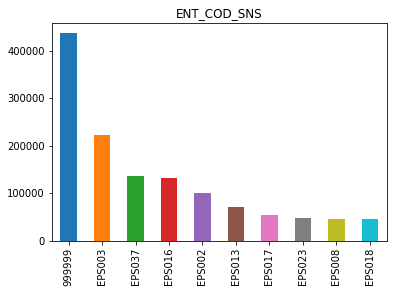

In [38]:
ENT_COD_SNS = dataset['ENT_COD_SNS'].loc[dataset['ENT_COD_SNS'] != '0'].value_counts().nlargest(n=10, keep='first')
ENT_COD_SNS.plot(kind='bar', title='ENT_COD_SNS');

In [33]:
dataset[['ENT_NOMBRE']].drop_duplicates().sort_values(by=['ENT_NOMBRE'])


,ENT_NOMBRE
403657,0
1298,AIC - ASOCIACIÓN INDÍGENA DEL CAUCA (EPS-I CAUCA)
332,ALIANSALUD
162,ALIANSALUD EPS S.A.
287,AMBUQ (BARRIOS UNDOS DE QUIBDO)
9371,ANAS WAYUU (EPS-I)
153,ARL - COLMENA
192,ARL - MAPFRE COLOMBIA VIDA SEGUROS S.A.
218,ARL - POSITIVA
537,ARL - SEGUROS BOLÍVAR
